In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from math import sqrt, cos, sin, radians, isclose, atan2, isclose
from fraction import Fraction
from IPython.core.interactiveshell import InteractiveShell
import copy
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def find_number_of_unique_radii(input_array):
    radius_values = []
    for i in range(0,len(input_array)):
        radius_values.append(input_array[i][2])
    radius_values.sort()
    radius_values = get_unique_array(radius_values)
    return np.array(radius_values)

def plot_myCircles(current_circle,graph_bounds):
    unique_radii = find_number_of_unique_radii(current_circle)
    # cmap = plt.get_cmap('hsv')
    # cmap = plt.get_cmap('nipy_spectral')
    # colors = [cmap(i / len(unique_radii)) for i in range(len(unique_radii))]
    # need to implement for loop that iterates through self.current_circle, come back to this later
    # Figure Generation
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    ax.cla() # clear things for fresh plot
    # change default range so that new circles will work
    ax.set_xlim((-1*graph_bounds, graph_bounds))
    ax.set_ylim((-1*graph_bounds,  graph_bounds))
    
    for i in range(0,len(current_circle)):
        # color = colors[int(np.where(unique_radii == current_circle[i][2])[0])]
        # circle = plt.Circle((current_circle[i][0], current_circle[i][1]), -1*current_circle[i][2], color=color,fill=False)
        circle = plt.Circle((current_circle[i][0], current_circle[i][1]), -1*current_circle[i][2],fill=False)
        ax.add_patch(circle)
    plt.show()
    
def find_small_r(R, number_of_starting_circles):
    match number_of_starting_circles:
        case 2:
            return R/2
        case 3:
            return R/(1+(2/sqrt(3)))
        case 4:
            return R/(1+sqrt(2))
        case 5:
            return R/(1+sqrt(2*(1+(1/sqrt(5)))))

def initialize_setup(number_of_starting_circles,R):
    r = find_small_r(R, number_of_starting_circles)
    current_circle = []
    current_angles = list(range(0,360,int(360/number_of_starting_circles)))
    for i in range(0,len(current_angles)):
        current_angles[i] = radians(current_angles[i]) 

    current_circle.append([0,0,R]) #   center, radius

    for placement_angles in current_angles:
        current_circle.append([(R-r)*cos(placement_angles),(R-r)*sin(placement_angles),r])    #  Define Circles
        
    return current_circle

def are_circles_tangent(circle1, circle2):
    #determines if two circles are tangent
    # circle = [x, y, r]
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    center_dist = sqrt((x1 - x2)**2 + (y1 - y2)**2)
    # Check for external tangency
    if isclose(center_dist, r1 + r2):
        return True
    # Check for internal tangency
    if isclose(center_dist, abs(r1 - r2)):
        return True
    return False

def track_tangent_circles(current_circle):
    #Creates NxN zero matrix (tracker) where N is the number of circles in current_circle. 
    # Loops through each pair of circles and notes where they are tangent in the zero matrix.
    tracker = []
    tracker = np.zeros((np.shape(current_circle)[0],np.shape(current_circle)[0],np.shape(current_circle)[0]))
    for i in range(0,len(current_circle)):
        for j in range(0,len(current_circle)):
            for k in range(0,len(current_circle)):
                if i != j and i != k and j != k:  # Ensure we are not comparing the same circle
                    if are_circles_tangent(current_circle[i], current_circle[j]) and are_circles_tangent(current_circle[i], current_circle[k]) and are_circles_tangent(current_circle[j], current_circle[k]):
                        tracker[i][j][k] = 1
                    else:
                        tracker[i][j][k] = 0
    tracker = tracker * np.tri(np.shape(tracker)[0], np.shape(tracker)[1], np.shape(tracker)[2], dtype=int)
    return tracker

def Complex_Add(complex_number1,complex_number2):
    #   Adds two complex numbers together and returns resulting complex number
    #   (a + ib) + (c + id) = (a + c) + i(b + d)
    a = complex_number1.real
    b = complex_number1.imag
    c = complex_number2.real
    d = complex_number2.imag
    return complex(a+c, b+d)

def Complex_Sub(complex_number1,complex_number2):
    #   Subtracts two complex numbers and returns resulting complex number
    #   (a + ib) - (c + id) = (a - c) + i(b - d)
    a = complex_number1.real
    b = complex_number1.imag
    c = complex_number2.real
    d = complex_number2.imag
    return complex(a-c, b-d)

def Complex_Real_Multiply(complex_number,constant_number):
    a = complex_number.real
    b = complex_number.imag
    return complex((a*constant_number),(b*constant_number))

def Complex_Multiply(complex_number_1,complex_number_2):
    # (a + ib) (c + id) = (ac - bd) + i(ad + bc)
    a = complex_number_1.real
    b = complex_number_1.imag
    c = complex_number_2.real
    d = complex_number_2.imag
    return complex((a*c)-(b*d),(a*d)+(b*c))

def Complex_Root(complex_number):
    a = complex_number.real
    b = complex_number.imag
    # Calculate distance from origin to imaginary point a+bi
    r = sqrt((a**2)+(b**2))
    root_r = sqrt(r)
    # Calculate angle theta for imaginary point a+bi
    # radians(current_angles[i]) 
    theta = atan2(b, a)
    half_theta = theta/2
    #   Calculate new real number
    return complex(root_r*cos(half_theta),root_r*sin(half_theta))

def Descartes_Theorem(k1,k2,k3):
    #   k4 = k1+k2+k3+/-2*sqrt(k1*k2+k2*k3+k1*k3)
    #   k4 has two possible values
    k_sum = k1+k2+k3
    k_multiple = max((k1*k2) + (k2*k3) + (k1*k3),0)
    # print(k_multiple)
    k4_a = k_sum + 2*sqrt(k_multiple)
    k4_b = k_sum - 2*sqrt(k_multiple)
    return k4_a, k4_b

def convert_toComplexNumbers(tangential_circles):
    temp = []
    for i in range(0,len(tangential_circles)):
        temp.append([complex(tangential_circles[i][0],tangential_circles[i][1]),tangential_circles[i][2]])
    return temp

def convert_toRealNumbers(tangential_circles):
    temp = []
    for i in range(0,len(tangential_circles)):
        temp.append([tangential_circles[i][0].real,tangential_circles[i][0].imag,tangential_circles[i][1]])
    return temp

def convert_from_k_to_r(tangential_circles):
    for i in range(0,len(tangential_circles)):
        if tangential_circles[i][2] != 0:
            tangential_circles[i][2] = 1/tangential_circles[i][2]
    return tangential_circles

def convert_from_r_to_k(tangential_circles):
    for i in range(0,len(tangential_circles)):
        if tangential_circles[i][2] != 0:
            tangential_circles[i][2] = 1/tangential_circles[i][2]
    return tangential_circles

def complexDescartesTheorem(current_circle):
    kissing_circle = []
    #   Calculates the center of the tangential circle:
    #       z4 = z1*k1+z2*k2+z3*k3+/-2(root(k1*k2*z1*z2+k2*k3*z2*z3+k1*k3*z1*z3))/k4
    #   z is the complex number of x,y (center coordinates or circle) where z = x + iy    
    z1 = current_circle[0][0]
    z2 = current_circle[1][0]
    z3 = current_circle[2][0]
    k1 = current_circle[0][1]
    k2 = current_circle[1][1]
    k3 = current_circle[2][1]
    k4a, k4b = Descartes_Theorem(k1,k2,k3)
    for k4 in [k4a, k4b]:
        r4 = 1/k4
        #########
        #   Calculate the first portion of Descartes Complex Theorem
        z1k1 = Complex_Real_Multiply(z1,k1)  #   Multiply complex number by curvature k (1/r)
        z2k2 = Complex_Real_Multiply(z2,k2)  #   Multiply complex number by curvature k (1/r)
        z3k3 = Complex_Real_Multiply(z3,k3)  #   Multiply complex number by curvature k (1/r)
        first_portion = Complex_Add(Complex_Add(z1k1,z2k2),z3k3)
        ###### 
        #   Calculate the second portion of Descartes Complex Theorem
        z1k1_z2k2_prod = Complex_Multiply(z1k1,z2k2)    #   Multiple two complex numbers together
        z2k2_z3k3_prod = Complex_Multiply(z2k2,z3k3)    #   Multiple two complex numbers together
        z1k1_z3k3_prod = Complex_Multiply(z1k1,z3k3)    #   Multiple two complex numbers together
        complex_number_sum = Complex_Add(Complex_Add(z1k1_z2k2_prod,z2k2_z3k3_prod),z1k1_z3k3_prod)   #   Add together above resulting multiples
        sqrt_second_portion = Complex_Root(complex_number_sum)  # Calculate the root of the complex number
        z4 = Complex_Real_Multiply(Complex_Add(first_portion,(Complex_Real_Multiply(sqrt_second_portion,2))),1/k4)    #   Calculate Final Complex Number
        kissing_circle.append([z4.real,z4.imag,r4]) #   center, radius
        z4 = Complex_Real_Multiply(Complex_Sub(first_portion,(Complex_Real_Multiply(sqrt_second_portion,2))),1/k4)    #   Calculate Final Complex Number        
        kissing_circle.append([z4.real,z4.imag,r4]) #   center, radius
        return kissing_circle
    
def circles_intersect_test(circle1, circle2, tol):
    # circle = [x, y, r]
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    center_dist = sqrt((x1 - x2)**2 + (y1 - y2)**2)
    # Circles intersect if their centers are closer than the sum of radii
    # and farther apart than the absolute difference of radii
    # return abs(r1 -  r2) < center_dist < (r1 + r2) 
    return isclose(center_dist, r1 + r2, abs_tol=tol) or isclose(center_dist, abs(r1 - r2), abs_tol=tol)
    
def three_circle_intersect_test(test_circle, other_circles, tol=0.02):
    # other_circles: list of three circles, each [x, y, r]
    return all(circles_intersect_test(test_circle, c, tol) for c in other_circles)

def find_my_tangent_circle(tangential_circles,kissing_circles):
    result = []
    for i in range(0,len(kissing_circles)):
        # print("before kissing_circles",kissing_circles)
        # print("tangential_circles",tangential_circles)
        if three_circle_intersect_test(kissing_circles[i],tangential_circles):
            result.append(kissing_circles[i])
    tangential_circles.extend(result)
    return tangential_circles

def round_my_circle(circle):
    for i in range(0,np.shape(circle)[0]):
        for j in range(0,np.shape(circle)[1]):
            # circle[i][j] = round(circle[i][j], 3)
            if circle[i][j] == -0.0:
                circle[i][j] = 0.0
    return circle

def get_unique_array(circle_array):
        unique_list = []
        for item in circle_array:
            if item not in unique_list:
                unique_list.append(item)
        return unique_list

def find_descartesCircles(current_circle,tracker,R):
    circle_results = []
    final_circles = []
    for i in range(0,len(current_circle)):
        for j in range(0,len(current_circle)):
            for k in range(0,len(current_circle)):
                if i != j and i != k and j != k:  # Ensure we are not comparing the same circle
                    if tracker[i][j][k] == 1:
                        tangential_circles = copy.deepcopy(current_circle)
                        tangential_circles = [tangential_circles[i], tangential_circles[j], tangential_circles[k]]
                        if tangential_circles[0][2] == R:
                            tangential_circles[0][2] = -1 * tangential_circles[0][2]
                        tangential_circles = convert_from_r_to_k(tangential_circles)
                        tangential_circles = convert_toComplexNumbers(tangential_circles)
                        kissing_circles = complexDescartesTheorem(tangential_circles)
                        tangential_circles[:3] = convert_toRealNumbers(tangential_circles[:3])
                        tangential_circles[:3] = convert_from_k_to_r(tangential_circles[:3])
                        if tangential_circles[0][2] == -1*(R/1):
                            tangential_circles[0][2] = -1 * tangential_circles[0][2]
                        kissing_circles = round_my_circle(kissing_circles)
                        tangential_circles = round_my_circle(tangential_circles)
                        tangential_circles = find_my_tangent_circle(tangential_circles,kissing_circles)
                        circle_results.append(tangential_circles)
    for items in circle_results:
        for item in items: 
            final_circles.append(item)
    return get_unique_array(final_circles)

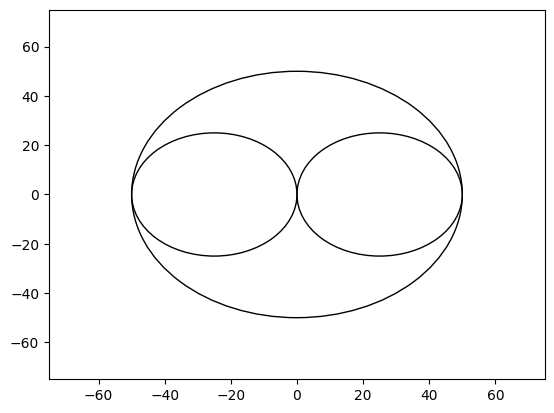

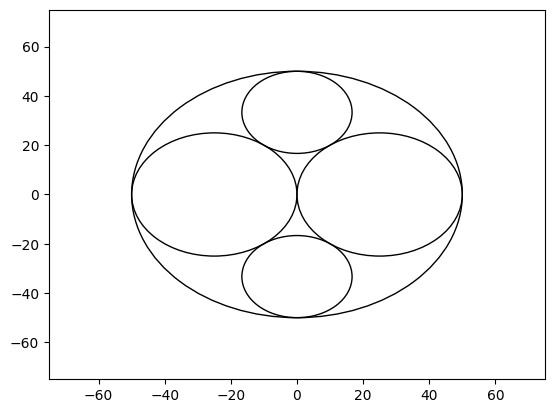

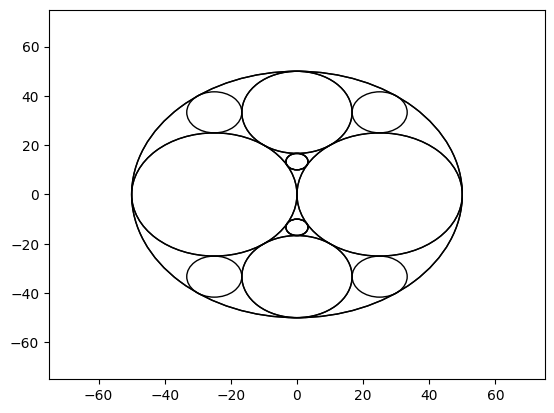

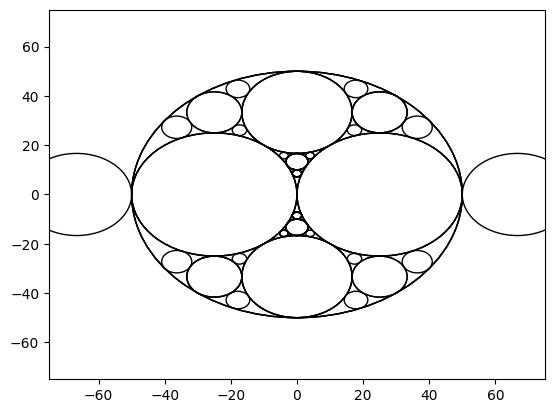

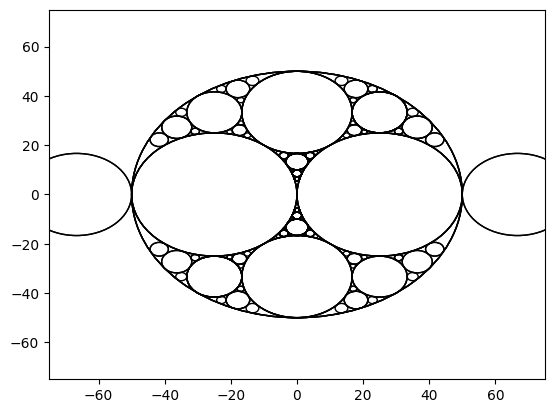

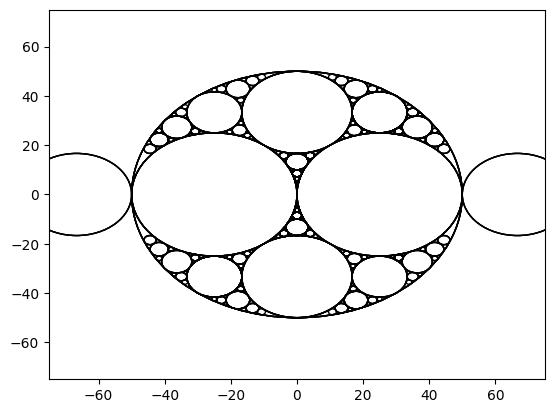

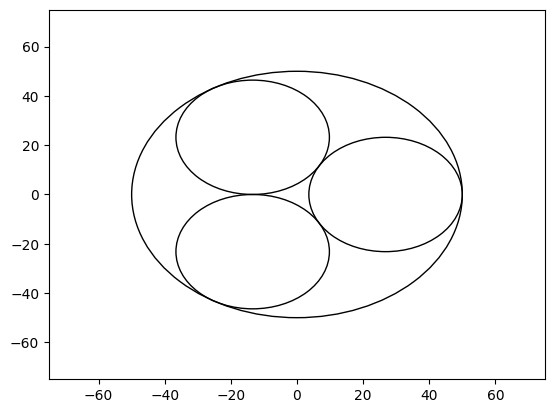

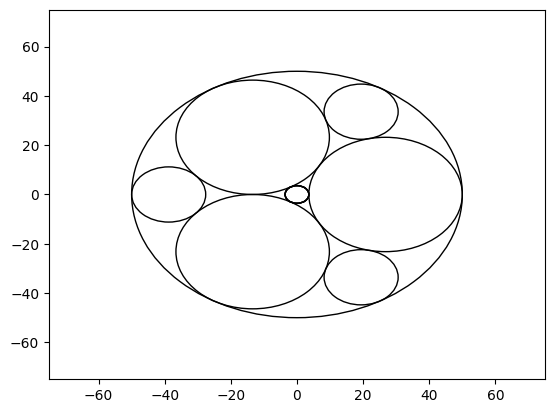

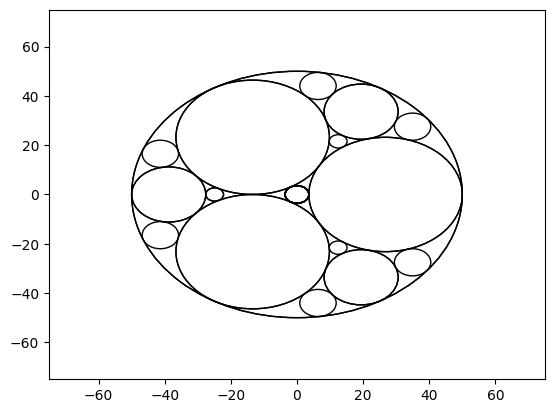

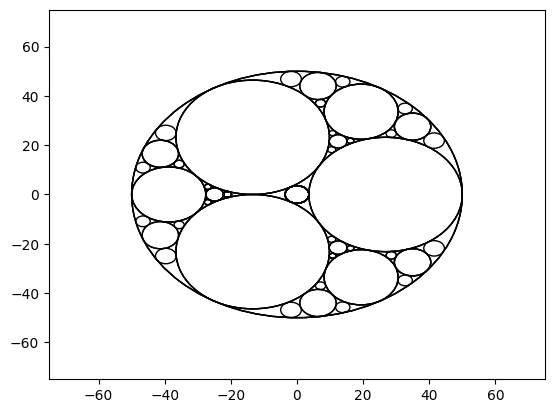

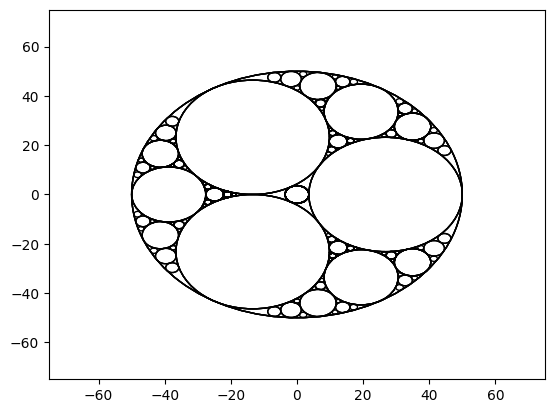

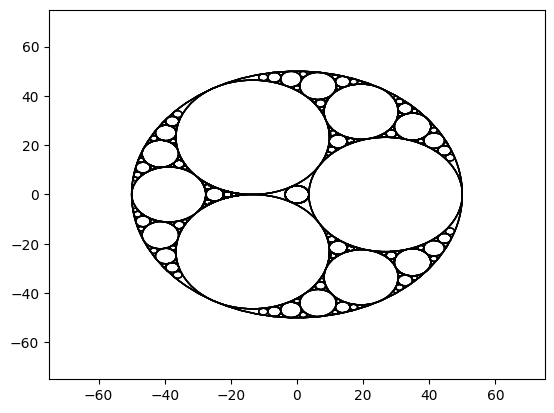

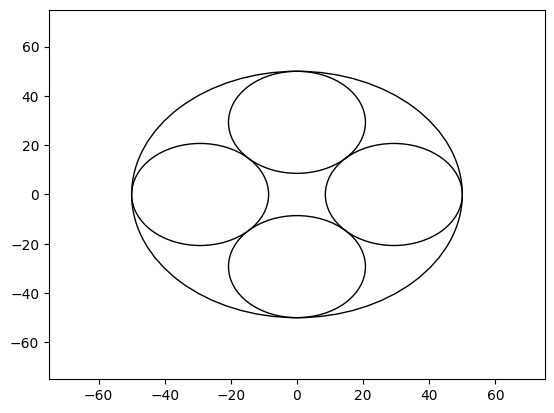

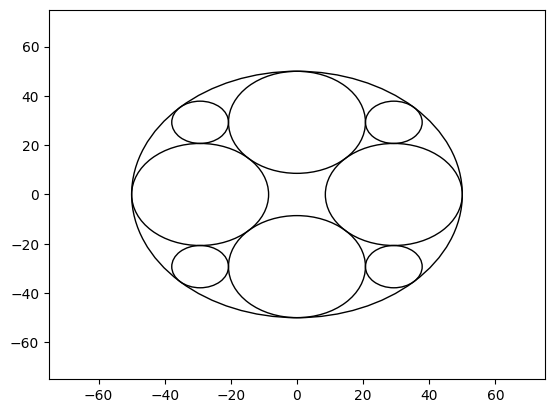

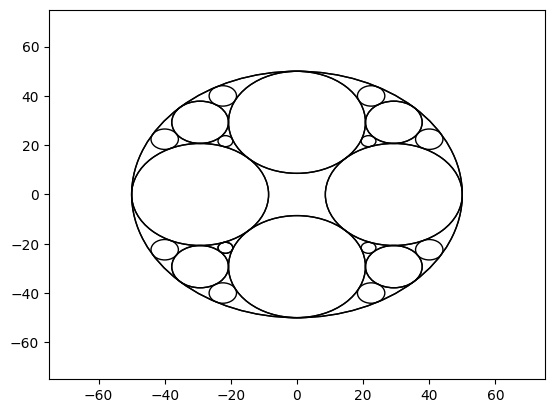

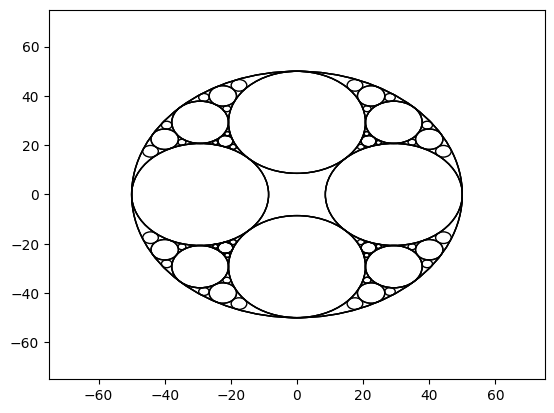

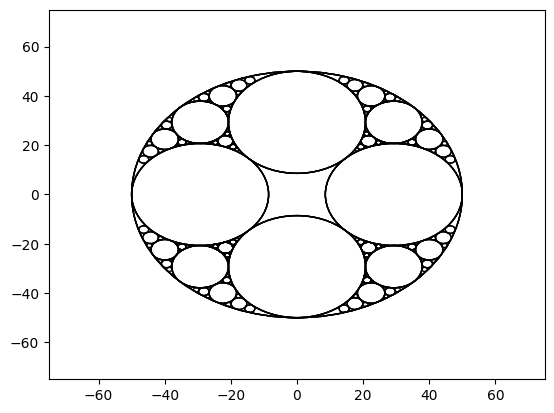

KeyboardInterrupt: 

In [28]:

R = 50
number_of_starting_inner_circles = 2
graph_bounds = R + R/2
cir_res = []
for i in range(0,5):
    tracker = []
    if i==0:
        current_circle = initialize_setup(number_of_starting_inner_circles, R)
        plot_myCircles(current_circle, graph_bounds)
        # print("np.shape(current_circle)",np.shape(current_circle))
        tracker = track_tangent_circles(current_circle)
        cir_res = find_descartesCircles(current_circle,tracker,R)
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)
    else:
        # print("np.shape(current_circle)",np.shape(cir_res))
        tracker = track_tangent_circles(cir_res)
        cir_res.extend(find_descartesCircles(cir_res,tracker,R))
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)

R = 50
number_of_starting_inner_circles = 3
graph_bounds = R + R/2
cir_res = []
for i in range(0,5):
    tracker = []
    if i==0:
        current_circle = initialize_setup(number_of_starting_inner_circles, R)
        plot_myCircles(current_circle, graph_bounds)
        # print("np.shape(current_circle)",np.shape(current_circle))
        tracker = track_tangent_circles(current_circle)
        cir_res = find_descartesCircles(current_circle,tracker,R)
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)
    else:
        # print("np.shape(current_circle)",np.shape(cir_res))
        tracker = track_tangent_circles(cir_res)
        cir_res.extend(find_descartesCircles(cir_res,tracker,R))
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)

R = 50
number_of_starting_inner_circles = 4
graph_bounds = R + R/2
cir_res = []
for i in range(0,5):
    tracker = []
    if i==0:
        current_circle = initialize_setup(number_of_starting_inner_circles, R)
        plot_myCircles(current_circle, graph_bounds)
        # print("np.shape(current_circle)",np.shape(current_circle))
        tracker = track_tangent_circles(current_circle)
        cir_res = find_descartesCircles(current_circle,tracker,R)
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)
    else:
        # print("np.shape(current_circle)",np.shape(cir_res))
        tracker = track_tangent_circles(cir_res)
        cir_res.extend(find_descartesCircles(cir_res,tracker,R))
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)

R = 50
number_of_starting_inner_circles = 5
graph_bounds = R + R/2
cir_res = []
for i in range(0,5):
    tracker = []
    if i==0:
        current_circle = initialize_setup(number_of_starting_inner_circles, R)
        plot_myCircles(current_circle, graph_bounds)
        # print("np.shape(current_circle)",np.shape(current_circle))
        tracker = track_tangent_circles(current_circle)
        cir_res = find_descartesCircles(current_circle,tracker,R)
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)
    else:
        # print("np.shape(current_circle)",np.shape(cir_res))
        tracker = track_tangent_circles(cir_res)
        cir_res.extend(find_descartesCircles(cir_res,tracker,R))
        # print("tracker",tracker.sum())
        # print("cir_res",cir_res)
        plot_myCircles(cir_res, graph_bounds)